Predict whether a Stackoverflow question will be acceptably answered. Using this public dataset of questions, create a machine learning dataset that you can use for classification.

What is a reasonable benchmark for this problem? What features might be useful?

If you got the above easily, try this harder problem: you want to predict whether a question will be acceptably answered within 2 days. How would you create the dataset?

https://bigquery.cloud.google.com/table/bigquery-public-data:stackoverflow.posts_questions?pli=1&tab=schema

bigquery-public-data:stackoverflow.posts_questions

In [1]:
import google.datalab.bigquery as bq
import pandas as pd
import numpy as np
import seaborn as sns
import shutil

## Extract sample data from BigQuery
All features in bigquery-public-data:stackoverflow.posts_questions:

id	title	body	accepted_answer_id	answer_count	comment_count	community_owned_date	creation_date	favorite_count	last_activity_date	last_edit_date	last_editor_display_name	last_editor_user_id	owner_display_name	owner_user_id	post_type_id	score	tags	view_count	



Features to be extracted using SQL:

id,	accepted_answer_id,	answer_count,	comment_count, creation_date, favorite_count, last_activity_date, score, view_count	


### Adding column to know the DateDifference for accepted answers

Use TIMESTAMP_DIFF(timestamp_1, timestamp_2, MINUTE)

In [72]:
rawdata = """
SELECT 
    id, accepted_answer_id, answer_count, comment_count, creation_date, favorite_count, last_activity_date,  score, view_count,
    TIMESTAMP_DIFF(last_activity_date, creation_date, DAY) as days_posted,
    IF(accepted_answer_id IS NULL , 0, 1) as accepted,
    (IF(answer_count IS NULL , 0, answer_count) 
    + IF(comment_count IS NULL , 0, comment_count)  
    + IF(favorite_count IS NULL , 0, favorite_count)  
    + IF(score IS NULL , 0, score)  
    + IF(view_count IS NULL , 0, view_count) ) 
    as total_score
FROM 
    `bigquery-public-data.stackoverflow.posts_questions`
WHERE
    MOD(ABS(FARM_FINGERPRINT(CAST(id as STRING))), 1000) = 1
"""
result = bq.Query(rawdata).execute().result().to_dataframe()
print("Total {} questions in StackOverflow Sample Dataset. ".format(len(result)))
result[:10]

Total 17226 questions in StackOverflow Sample Dataset. 


,id,accepted_answer_id,answer_count,comment_count,creation_date,favorite_count,last_activity_date,score,view_count,days_posted,accepted,total_score
0,4444407,4448576.0,7,3,2010-12-14 21:26:55.700,8.0,2018-09-13 19:37:45.930,49,38633,2829,1,38700
1,1458636,1458695.0,7,0,2009-09-22 07:36:25.603,1.0,2016-12-28 02:25:23.843,43,135088,2653,1,135139
2,332178,332206.0,7,2,2008-12-01 20:56:15.977,11.0,2019-02-13 11:24:10.163,22,19610,3725,1,19652
3,4812869,4819124.0,7,1,2011-01-27 04:53:02.177,39.0,2018-08-31 04:57:00.880,43,17785,2773,1,17875
4,2910983,2957315.0,14,0,2010-05-26 07:43:51.943,3.0,2014-11-21 09:48:28.793,16,10334,1640,1,10367
5,5406037,5406289.0,9,21,2011-03-23 13:35:35.177,24.0,2012-02-07 20:04:44.827,58,7647,321,1,7759
6,45836650,46838044.0,8,0,2017-08-23 10:03:41.133,10.0,2019-02-27 17:21:14.043,10,5557,553,1,5585
7,682439,682463.0,7,1,2009-03-25 16:49:16.140,7.0,2015-07-27 16:28:32.997,20,21762,2314,1,21797
8,9222621,9222725.0,7,1,2012-02-10 04:18:16.973,6.0,2017-06-07 18:14:24.830,10,8519,1944,1,8543
9,439796,NaN,7,0,2009-01-13 16:56:07.210,NaN,2015-04-18 21:49:27.760,2,179,2286,0,188


## Exploring data
Python Seaborn package to visualize graphs and Pandas to do the slicing and filtering.

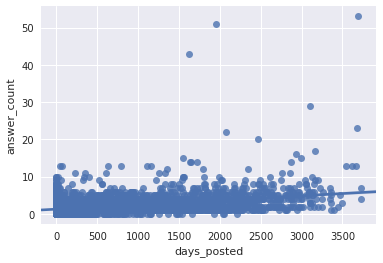

In [34]:
ax = sns.regplot(x="days_posted", y="answer_count", data=result)

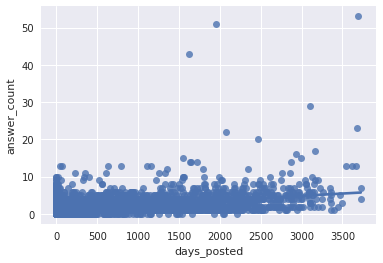

In [35]:
ax = sns.regplot(x="days_posted", y="answer_count", ci = None, truncate= True, data=result)

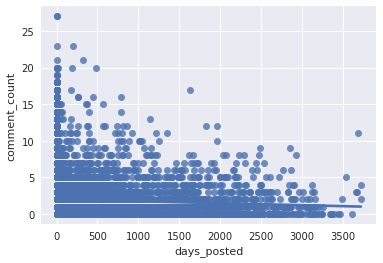

In [36]:
ax = sns.regplot(x="days_posted", y="comment_count", ci = None, truncate= True, data=result)

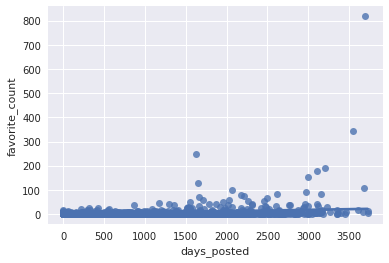

In [37]:
ax = sns.regplot(x="days_posted", y="favorite_count", ci = None, truncate= True, data=result)

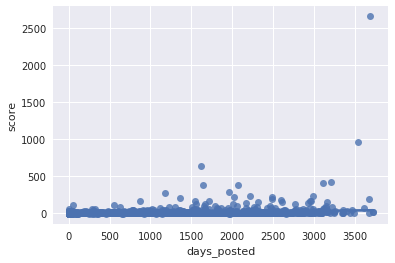

In [38]:
ax = sns.regplot(x="days_posted", y="score", ci = None, truncate= True, data=result)

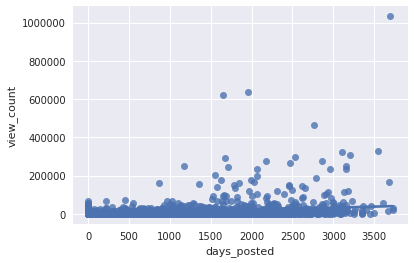

In [41]:
ax = sns.regplot(x="days_posted", y="view_count", ci = None, truncate= True, data=result)

## Count vs Accepted

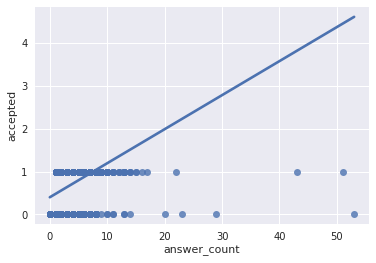

In [65]:
ax = sns.regplot(x="answer_count", y="accepted", ci = None, truncate= True, data=result)

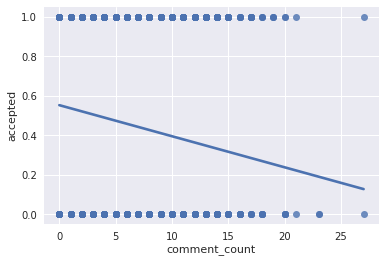

In [66]:
ax = sns.regplot(x="comment_count", y="accepted", ci = None, truncate= True, data=result)

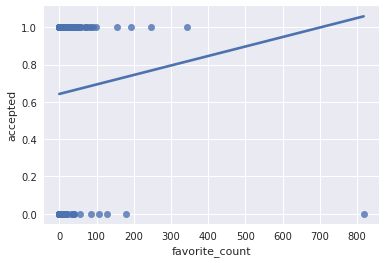

In [67]:
ax = sns.regplot(x="favorite_count", y="accepted", ci = None, truncate= True, data=result)

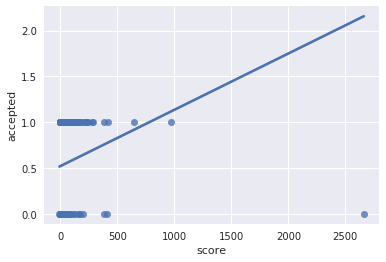

In [68]:
ax = sns.regplot(x="score", y="accepted", ci = None, truncate= True, data=result)

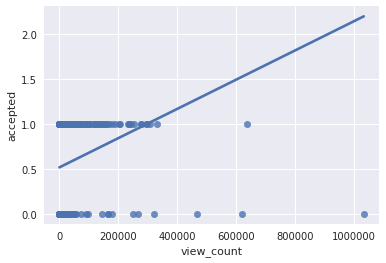

In [69]:
ax = sns.regplot(x="view_count", y="accepted", ci = None, truncate= True, data=result)